## Operações básicas com OpenCV
***

Biblioteca para processamento de imagens e visão computacional

```
sudo apt-get install python-opencv
```

Leitura, escrita, cortar, converter, rotacionar, redimensionar, brilho, contraste e pixel.

***

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def mostrar_imagem(img):
    imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imagem_colorida)
    plt.title("Imagem")
    plt.axis("off")
    plt.show()

In [3]:
def mostrar_imagem_em_janela(img):
    cv.imshow("Imagem", img)
    cv.waitKey(0) # Espera a tecla de algum botão
    cv.destroyAllWindows() # Remove o objeto

***
### Leitura
***

In [4]:
# Pegar a imagem
imagem = cv.imread("./imagens/familia.jpg")

In [5]:
# Mostrar algumas informações
altura = imagem.shape[0]
largura = imagem.shape[1]
canais = imagem.shape[2]
print("Altura: {} pixels".format(altura))
print("Largura: {} pixels".format(largura))
print("Canais: {}".format(canais)) # Canais de cores RGB

Altura: 408 pixels
Largura: 612 pixels
Canais: 3


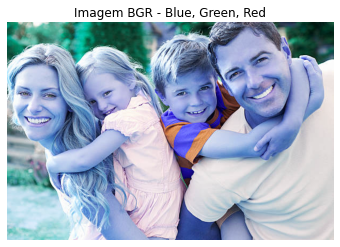

In [6]:
# Mostrar imagem no formato BGR com matplotlib
plt.imshow(imagem)
plt.title("Imagem BGR - Blue, Green, Red")
plt.axis("off")
plt.show()

***
### Salvar
***

In [7]:
# Salvar a imagem
cv.imwrite("imagens/new_image.jpg", imagem)

True

***
### Texto
***

In [8]:
imagem = cv.imread("./imagens/familia.jpg")

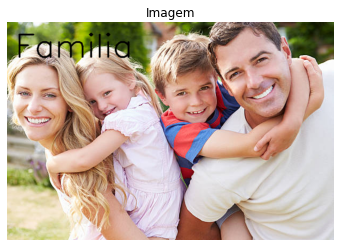

In [9]:
posicao = (15, 65)
cv.putText(
    img = imagem,
    text = "Familia",
    org = posicao,
    fontFace = cv.FONT_HERSHEY_SIMPLEX,
    fontScale = 2,
    color = (0, 0, 0),
    thickness = 2,
    lineType = cv.LINE_AA
)
mostrar_imagem(imagem)

***
### Cortar (Cropping)
***

In [10]:
imagem = cv.imread("./imagens/familia.jpg")

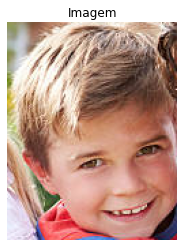

In [11]:
# A ordem em que especificamos as coordenadas devem ser colocadas:
# [startY: endY, startX: endX]
img_cortado = imagem[30:190, 265:390]
mostrar_imagem(img_cortado)

***
### Inversão (Flipping)
***

In [12]:
imagem = cv.imread("./imagens/familia.jpg")

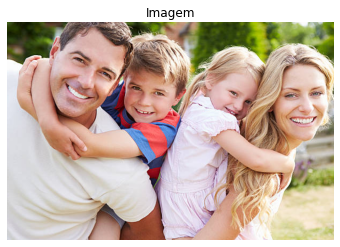

In [13]:
horizontal = 1
img_invetida = cv.flip(imagem, horizontal)
mostrar_imagem(img_invetida)

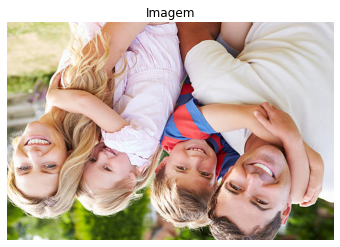

In [14]:
vertical = 0
img_invetida = cv.flip(imagem, vertical)
mostrar_imagem(img_invetida)

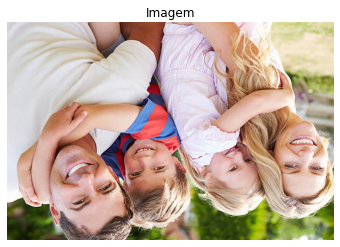

In [15]:
horizontal_e_vertical = -1
img_invetida = cv.flip(imagem, horizontal_e_vertical)
mostrar_imagem(img_invetida)

***
### Converter
***

In [16]:
imagem = cv.imread("./imagens/familia.jpg")

In [17]:
img_colorida = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)

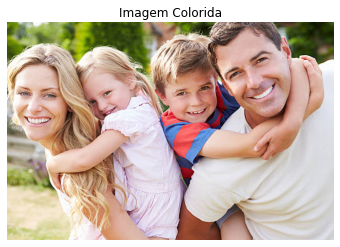

In [18]:
plt.imshow(img_colorida)
plt.title("Imagem Colorida")
plt.axis("off")
plt.show()

In [19]:
img_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

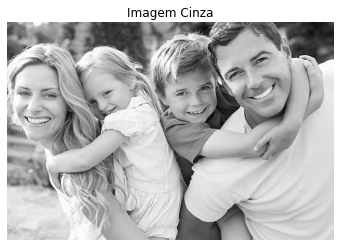

In [20]:
plt.imshow(img_cinza, cmap='gray')
plt.title("Imagem Cinza")
plt.axis("off")
plt.show()

***
### Extrair canais de cores (Split)
***

In [21]:
imagem = cv.imread("./imagens/familia.jpg")

In [22]:
# Obtem cada canal Azul, Verde e Vermelho por meio de uma array NumPy
(B, G, R) = cv.split(imagem)

In [23]:
print(B, G, R)

[[  4   2   2 ...  21  24  24]
 [  6   5   3 ...  23  24  26]
 [  6   6   5 ...  23  25  27]
 ...
 [163 163 163 ... 222 222 222]
 [175 172 171 ... 221 220 219]
 [183 180 176 ... 219 218 217]] [[109 109 114 ...  91  94  96]
 [117 118 122 ...  90  94  96]
 [127 129 134 ...  89  92  94]
 ...
 [210 210 210 ... 215 215 215]
 [213 212 211 ... 214 213 212]
 [216 216 214 ... 212 211 210]] [[ 82  82  84 ...  61  64  66]
 [ 89  90  91 ...  61  64  66]
 [ 99 101 103 ...  60  63  65]
 ...
 [224 224 224 ... 212 212 212]
 [231 230 229 ... 211 210 209]
 [235 234 232 ... 209 208 207]]


***
### Mesclando imagens
***

In [24]:
zeros = np.zeros(imagem.shape[:2], dtype="uint8")

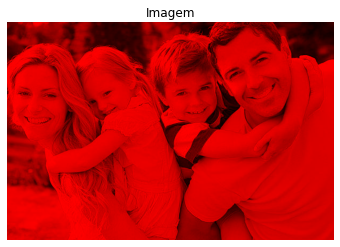

In [25]:
# Vermelho
mostrar_imagem(cv.merge([zeros, zeros, R]))

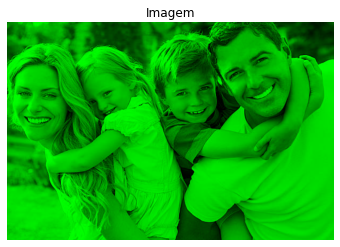

In [26]:
# Verde
mostrar_imagem(cv.merge([zeros, G, zeros]))

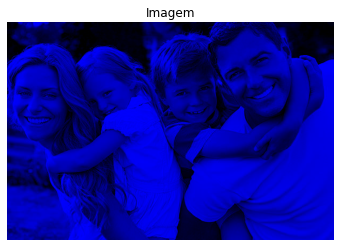

In [27]:
# Azul
mostrar_imagem(cv.merge([B, zeros, zeros]))

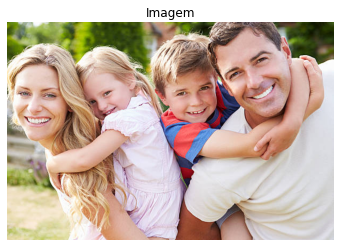

In [28]:
# Imagem junta novamente
mostrar_imagem(cv.merge([B, G, R]))

***
### Rotacionar
***

In [29]:
imagem = cv.imread("./imagens/familia.jpg")

In [30]:
# Calcula o centro da imagem
centro = (largura // 2, altura // 2)

In [31]:
# Cria a matriz de rotação
matriz = cv.getRotationMatrix2D(
    center=centro,
    angle=45,
    scale=1.0
)

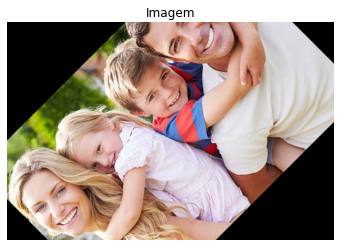

In [32]:
# Rotaciona a imagem
img_rotacionada = cv.warpAffine(
    src=imagem,
    M=matriz,
    dsize=(largura, altura)
)
mostrar_imagem(img_rotacionada)

***
### Transladar
***

In [33]:
imagem = cv.imread("./imagens/familia.jpg")

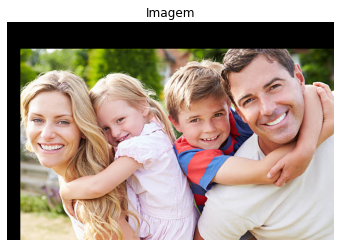

In [34]:
# O shifting de uma imagem é dada por uma matriz NumPy na forma: [[1, 0, shiftX], [0, 1, shiftY]]
# Você simplesmente precisa especificar quantos pixels você deseja para mudar a imagem
# nas direções X e Y. Vamos transladar a imagem 25 pixels para direira e 50 pixels para baixo
matriz = np.float32([[1, 0, 25], [0, 1, 50]])
img_transladado = cv.warpAffine(imagem, matriz, (largura, altura))
mostrar_imagem(img_transladado)

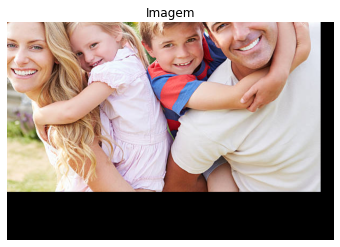

In [35]:
# Vamos transladar a imagem 25 pixels para esquerda e 90 pixels para cima
matriz = np.float32([[1, 0, -25], [0, 1, -90]])
img_transladado = cv.warpAffine(imagem, matriz, (largura, altura))
mostrar_imagem(img_transladado)

***
### Manipular pixels
***

In [36]:
imagem = cv.imread("./imagens/familia.jpg")

In [37]:
# O openCV armazena as cores na ordem inversa (blue, green, red) - BGR
# Ele faz isso por eficiência e imagens são arrays numpy
(b, g, r) = imagem[0, 0]

In [38]:
print("Pixel nas coordenadas (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel nas coordenadas (0, 0) - Red: 82, Green: 109, Blue: 4


In [39]:
# Vamos mudar o valor do pixel
imagem[0, 0] = (0, 0, 255)
(b, g, r) = imagem[0, 0]
print("Pixel nas coordenadas (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel nas coordenadas (0, 0) - Red: 255, Green: 0, Blue: 0


In [40]:
# Como estamos usando matrizes numpy, podemos aplicar slicing e obter grandes pedaços
# da imagem, por exemplo a parte superior esquerda
margem_esquerda = imagem[0:100, 0:100]

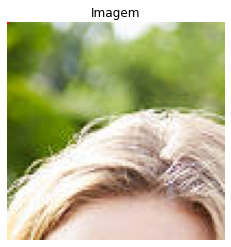

In [41]:
mostrar_imagem(margem_esquerda)

In [42]:
# Mudar a cor da magem esquerda para verde
imagem[0:100, 0:100] = (0, 255, 0)

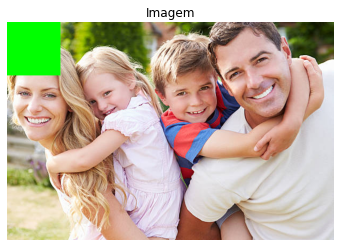

In [43]:
mostrar_imagem(imagem)